In [34]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

trainset = datasets.MNIST('train', download=True, train=True, transform=transform)
valset = datasets.MNIST('test', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

2.0%

100.0%


Extracting train\MNIST\raw\train-images-idx3-ubyte.gz to train\MNIST\raw


100.0%
2.0%


Extracting train\MNIST\raw\train-labels-idx1-ubyte.gz to train\MNIST\raw



100.0%
100.0%


Extracting train\MNIST\raw\t10k-images-idx3-ubyte.gz to train\MNIST\raw

Extracting train\MNIST\raw\t10k-labels-idx1-ubyte.gz to train\MNIST\raw



7.3%

100.0%


Extracting test\MNIST\raw\train-images-idx3-ubyte.gz to test\MNIST\raw


100.0%
2.0%


Extracting test\MNIST\raw\train-labels-idx1-ubyte.gz to test\MNIST\raw



100.0%
100.0%

Extracting test\MNIST\raw\t10k-images-idx3-ubyte.gz to test\MNIST\raw

Extracting test\MNIST\raw\t10k-labels-idx1-ubyte.gz to test\MNIST\raw



torch.Size([64, 1, 28, 28])
torch.Size([64])


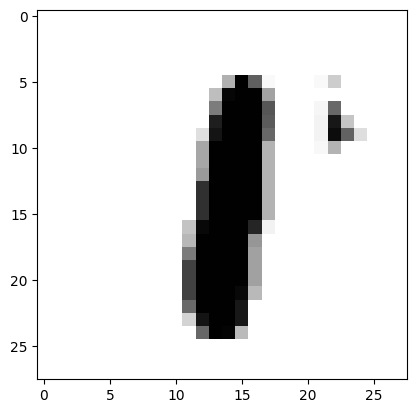

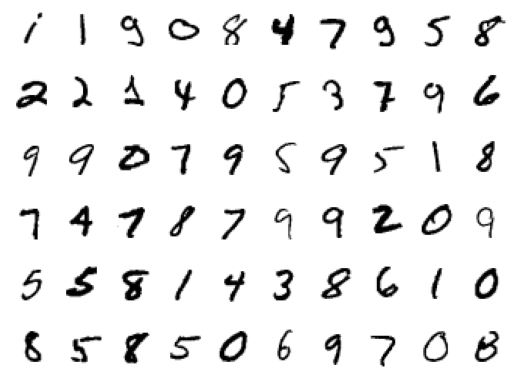

In [43]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [44]:
input_size = 784
hidden_sizes = [128]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
  (3): LogSoftmax(dim=1)
)


In [45]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)


Before backward pass: 
 None
After backward pass: 
 tensor([[ 4.3853e-04,  4.3853e-04,  4.3853e-04,  ...,  4.3853e-04,
          4.3853e-04,  4.3853e-04],
        [ 1.0039e-02,  1.0039e-02,  1.0039e-02,  ...,  1.0039e-02,
          1.0039e-02,  1.0039e-02],
        [ 7.9157e-03,  7.9157e-03,  7.9157e-03,  ...,  7.9157e-03,
          7.9157e-03,  7.9157e-03],
        ...,
        [ 6.8991e-04,  6.8991e-04,  6.8991e-04,  ...,  6.8991e-04,
          6.8991e-04,  6.8991e-04],
        [ 1.6814e-02,  1.6814e-02,  1.6814e-02,  ...,  1.6814e-02,
          1.6814e-02,  1.6814e-02],
        [-9.7976e-06, -9.7976e-06, -9.7976e-06,  ..., -9.7976e-06,
         -9.7976e-06, -9.7976e-06]])


In [40]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
for e in range(25):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        loss.backward()

        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.5295599283281166
Epoch 1 - Training loss: 0.291814583355684
Epoch 2 - Training loss: 0.2415228827254795
Epoch 3 - Training loss: 0.20503540789442404
Epoch 4 - Training loss: 0.17890354743136017
Epoch 5 - Training loss: 0.16050584179394917
Epoch 6 - Training loss: 0.14484855589836138
Epoch 7 - Training loss: 0.13317903155075717
Epoch 8 - Training loss: 0.12309456114043622
Epoch 9 - Training loss: 0.11398444155842732
Epoch 10 - Training loss: 0.1074192635595862
Epoch 11 - Training loss: 0.10072259392156434
Epoch 12 - Training loss: 0.0943076555321275
Epoch 13 - Training loss: 0.08889358552413057
Epoch 14 - Training loss: 0.08453797014640656
Epoch 15 - Training loss: 0.08047311429603538
Epoch 16 - Training loss: 0.0768489725038862
Epoch 17 - Training loss: 0.07251824782257761
Epoch 18 - Training loss: 0.0701527855649932
Epoch 19 - Training loss: 0.06731377564656582
Epoch 20 - Training loss: 0.06423832481947424
Epoch 21 - Training loss: 0.062274835142455916
Epoch

Predicted Digit = 3


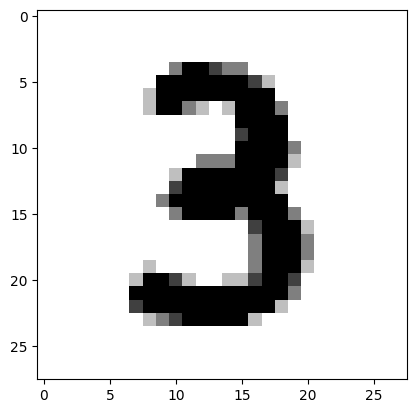

In [41]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');
print("Predicted Digit =", probab.index(max(probab)))

In [42]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9725


In [20]:
torch.save(model, './my_mnist_model.pt') 